<a href="https://colab.research.google.com/github/armanut86/arman/blob/master/q5%20issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import block
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D   
from numpy import linalg as LNG 
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy import optimize
import csv
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

First of all I want to show that my appraoch is working fine with the test example from the telegram image:

#example test of the given function in the telegram

In [3]:

def f(x):#defining the main function
  out=x[0]**4+x[0]**2+x[1]**2
  return out;
def gradf(x): #defining the gradient
  y=np.zeros_like(x)
  y[0]=4*x[0]**3+2*x[0]
  y[1]=2*x[1]
  return y;
def update(x,a):
  return x-a*gradf(x);

def cala(a=0.0001,gamma=.5):  #armijo with the parameters provided in the question
  flag1=0  #calculation of the armijo rule
  t=1
  while flag1<1:
    if f(x-t*gradf(x))<=(f(x)+a*t*np.transpose(gradf(x))@(-1*gradf(x))**2):
      out=t
      flag1=10
    else:
      t=gamma*t
      print(t)
  return out;
def stopping2(x): #stopping criteria
  if LNG.norm(gradf(x)) <0.001:
    out=1
  else:
    out=0
  return out;
    

In [4]:
x=[1,1]
t=cala()


0.5
0.25


In [ ]:
print(f(x-t*gradf(x)),(f(x)-a*t*LNG.norm(gradf(x))**2))

0.5625 2.999


We can see the armijo search is succssfully taken care of for this example. Thus in the implementation or the sign there is nothing wrong!

However for the main problem, we know that at (0,0) the gradient is equal to $\nabla f(0,0)=(-3,-2)$. So what is d in this iteration?: $d=-\nabla f(0,0)=(3,2)$. Now we can check for the inequality first the left handsight f(x+td)=f((0,0)+t(3,2)), note that f(t) for all t>0 is always f(t)>0. Now if we check the righthand side of the inequality $f(x)+a*t*\nabla f(x)^T\nabla f(x)=0+.1*t*(-3,-2)^T(3,2)=-t*1.3$ which is negative for all t>0 meaning that unless t<=0 the inequality never is satisfied!!

In [6]:
#main
def f(x):#defining the main function
  out=2*x[0]**4+3*x[1]*4+2*x[0]**2+4*x[1]**2+x[0]*x[1]-3*x[0]-3*x[1]
  return out;
def gradf(x): #defining the gradient
  y=np.zeros_like(x)
  y[0]=8*x[0]**3+4*x[0]+x[1]-3
  y[1]=12*x[1]**3+8*x[1]+x[0]-2
  return y;
def update(x,a):
  return x-a*gradf(x);

def cala(a=0.0001,gamma=.5):  #armijo with the parameters provided in the question
  flag1=0  #calculation of the armijo rule
  t=1
  while flag1<1:
    if f(x-t*gradf(x))<=(f(x)+a*t*np.transpose(gradf(x))@(-1*gradf(x))**2):
      out=t
      flag1=10
    else:
      t=gamma*t
      print(t)
  return out;
def stopping2(x): #stopping criteria
  if LNG.norm(gradf(x)) <0.001:
    out=1
  else:
    out=0
  return out;
    

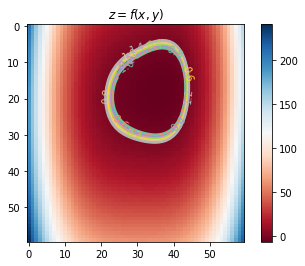

In [ ]:
x1=[]
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
x1.append(X)
x1.append(Y)
Z = f(x1) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=f(x,y)$')
show()

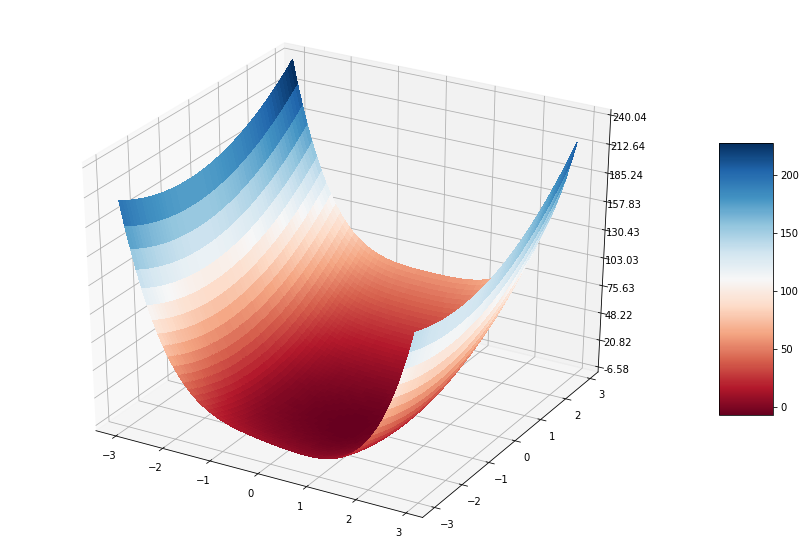

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [8]:
x=np.transpose(np.array([0,0]))


In [9]:
a=cala()

0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
0.0009765625
0.00048828125
0.000244140625
0.0001220703125
6.103515625e-05
3.0517578125e-05
1.52587890625e-05
7.62939453125e-06
3.814697265625e-06
1.9073486328125e-06
9.5367431640625e-07
4.76837158203125e-07
2.384185791015625e-07
1.1920928955078125e-07
5.960464477539063e-08
2.9802322387695312e-08
1.4901161193847656e-08
7.450580596923828e-09
3.725290298461914e-09
1.862645149230957e-09
9.313225746154785e-10
4.656612873077393e-10
2.3283064365386963e-10
1.1641532182693481e-10
5.820766091346741e-11
2.9103830456733704e-11
1.4551915228366852e-11
7.275957614183426e-12
3.637978807091713e-12
1.8189894035458565e-12
9.094947017729282e-13
4.547473508864641e-13
2.2737367544323206e-13
1.1368683772161603e-13
5.684341886080802e-14
2.842170943040401e-14
1.4210854715202004e-14
7.105427357601002e-15
3.552713678800501e-15
1.7763568394002505e-15
8.881784197001252e-16
4.440892098500626e-16
2.220446049250313e-16
1.1102230246251565e-16
5.55

as we see that code shows the same thing.